# EDA of final final and comparison with old file

## 1. Preliminaries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
from comparison_of_final_files.compare_two_final_csvs import FinalCrbaFileComparator
#from comparison_of_final_files import FinalCrbaFileComparator

In [2]:
# Instantiate class

crba_final_2020 = pd.read_csv("../config/2020/out/data/crba_final.csv", ";") 
crba_final_2023 = pd.read_csv("../config/2023/out/data/crba_final.csv", ";")

my_comparer = FinalCrbaFileComparator(
    crba_final_2020,
    crba_final_2023
)

# NB: df_2 is crba_final_2023

/tmp/ipykernel_27089/76634259.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  crba_final_2020 = pd.read_csv("../config/2020/out/data/crba_final.csv", ";")
/tmp/ipykernel_27089/76634259.py:3: DtypeWarning: Columns (13,19,26,27,28,32,33,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  crba_final_2020 = pd.read_csv("../config/2020/out/data/crba_final.csv", ";")
/tmp/ipykernel_27089/76634259.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  crba_final_2023 = pd.read_csv("../config/2023/out/data/crba_final.csv", ";")
/tmp/ipykernel_27089/76634259.py:4: DtypeWarning: Columns (1,2,3,16,27,29,30,38) have mixed types. Specify dtype option on import or set low_memory=False.
  crba_final_2023 = pd.read_csv("../config/2023/out/data/crba_final.csv", ";")


# 2. EDA on final file

1. Number of NAN countries per indicator
2. Number of NA observations per country
3. Number of indicators per category
4. Top and bottom 5 countries overall and per INDEX

## 2.1 Numer of NAN countries per indicator

In [3]:
# Number of NAN countries per indicator
my_comparer.get_number_of_NA_per_column_value(
    my_comparer.df_2,
    column_for_per_category="INDICATOR_CODE"
)

INDICATOR_CODE
CE_RD_LF_COCLCH      0
WP_DW_LF_MIWOFC      0
WP_DW_LF_MIWAFC      0
WP_CL_LF_ABFOLC      0
CE_RD_LF_BASCON      0
                  ... 
CE_RD_EN_REGOEM    160
MP_MA_LF_REMACH    160
MP_PS_OC_ELWARE    164
WP_DW_EN_COBACO    176
WP_DW_OC_FREASS    186
Length: 197, dtype: int64

## 2.2 Numer of NA observations per country

In [4]:
# Number of NAN countries per indicator
my_comparer.get_number_of_NA_per_column_value(
    my_comparer.df_2,
    column_for_per_category="COUNTRY_ISO_3"
)

COUNTRY_ISO_3
GHA      5
MEX     10
IDN     10
COL     10
TZA     10
      ... 
PSE     76
PLW     78
LIE     87
MCO     88
XKX    138
Length: 195, dtype: int64

## 2.3 Numberer of indicators per category

In [5]:
# my_comparer.get_number_of_indicators_per_column(
#     df = my_comparer.df_1
# )

In [6]:
my_comparer.get_number_of_indicators_per_column(
    df = my_comparer.df_2
)


 
 This is the number of indicators per INDICATOR_INDEX
INDICATOR_INDEX
Workplace                    78
Community and Environment    72
Marketplace                  56
dtype: int64

 
 This is the number of indicators per INDICATOR_CATEGORY
INDICATOR_CATEGORY
Legal framework national         62
Outcome                          52
Enforcement                      49
Legal framework international    43
dtype: int64

 
 This is the number of indicators per INDICATOR_ISSUE
INDICATOR_ISSUE
Decent working conditions                     33
Marketing and Advertising                     25
Child labour                                  24
Resource use and damage to the environment    22
Maternity and paternity protection            21
Online Abuse and exploitation                 19
Security arrangements                         17
Fulfillment of children’s rights              13
Product Safety                                12
Natural disasters                             11
Land rights        

## 2.4 Top and bottom 5 countries overall

In [7]:
my_comparer.get_top_and_worst_countries_per_category("OVERALL")

Top 5 countries:     COUNTRY_ISO_3  TIME_PERIOD  ATTR_DATA_EXTRACTION_METHDOLOGY  \
56            FIN  2020.392857                              NaN   
12            BEL  2020.468085                              NaN   
129           NOR  2020.326360                              NaN   
43            CZE  2020.035573                              NaN   
47            DNK  2020.725738                              NaN   

     CRBA_RELEASE_YEAR  RAW_OBS_VALUE  SCALED_OBS_VALUE  CATEGORY_ISSUE_SCORE  \
56              2023.0      31.220453          8.260778              8.105920   
12              2023.0      40.988776          8.035563              7.977413   
129             2023.0      49.995911          8.237619              8.126495   
43              2023.0      28.054162          8.204012              7.882547   
47              2023.0      39.774166          7.979038              7.906491   

     ISSUE_INDEX_SCORE  INDEX_SCORE  OVERALL_SCORE  
56            8.326913     8.323733     

/home/lasse/Development/crba-allinone/validation/comparison_of_final_files/compare_two_final_csvs.py:124: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = self.df_2.groupby("COUNTRY_ISO_3", as_index=False).mean()


In [8]:
my_comparer.get_top_and_worst_countries_per_category("INDEX")

Calculating top and bottom countrie for INDICATORINDEX ==  Workplace
Top 5 countries:     COUNTRY_ISO_3 INDICATOR_INDEX  TIME_PERIOD  \
494           SWE       Workplace  2021.738095   
389           NOR       Workplace  2021.615385   
491           SVN       Workplace  2021.525000   
143           DNK       Workplace  2021.871795   
131           CZE       Workplace  2021.388889   

     ATTR_DATA_EXTRACTION_METHDOLOGY  CRBA_RELEASE_YEAR  RAW_OBS_VALUE  \
494                              NaN             2023.0       9.427726   
389                              NaN             2023.0      12.884403   
491                              NaN             2023.0      10.195070   
143                              NaN             2023.0       9.309179   
131                              NaN             2023.0      12.410271   

     SCALED_OBS_VALUE  CATEGORY_ISSUE_SCORE  ISSUE_INDEX_SCORE  INDEX_SCORE  \
494          7.968750              8.027560           8.296403     8.349762   
389       

/home/lasse/Development/crba-allinone/validation/comparison_of_final_files/compare_two_final_csvs.py:130: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = self.df_2.groupby(["COUNTRY_ISO_3", "INDICATOR_INDEX"], as_index=False).mean()


# 3. Comparison of files of 2023 and 2020

1. Comparison of existing olumns
2. Compare distributions of `TIME_PERIOD` 
3. Compare distribution of scores
    5.1 Overall score
    5.2 Score per INDEX
4. Which country has improved/ worsened most? 
5. For which observations has `TIME_PERIOD` become older?
6. Which indicators have been retired/ added between 2020 and 2023?
7. Percentage of observations for which we have new data

(SKIPPED Run the same health checks (i.e. Indonesia > Canada) as before)

## 3.1 Comparison of existing column

In [9]:
my_comparer.compare_existing_columns()

Columns that are in df_1 which aren_t in df_2 {'DIM_ELEMENT_TYPE', 'INTERNAL_SOURCE_ID', 'Unnamed: 0', 'DIM_MANAGEMENT_LEVEL'}
Columns that are in df_2 which aren_t in df_1 {'SOURCE_ID'}


## 3.2. Comparison of distributions of TIME_PERIOD

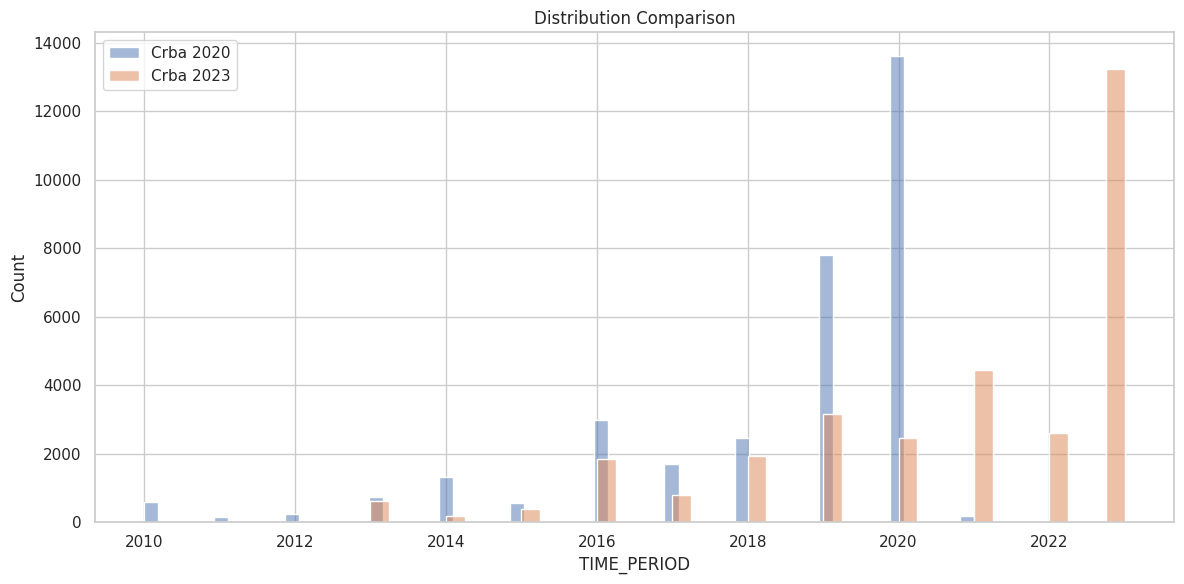

In [10]:
my_comparer.compare_column_distribution("TIME_PERIOD")

## 3.3 Comparison of distributions of scores
### 3.3.1 OVERALL SCORE

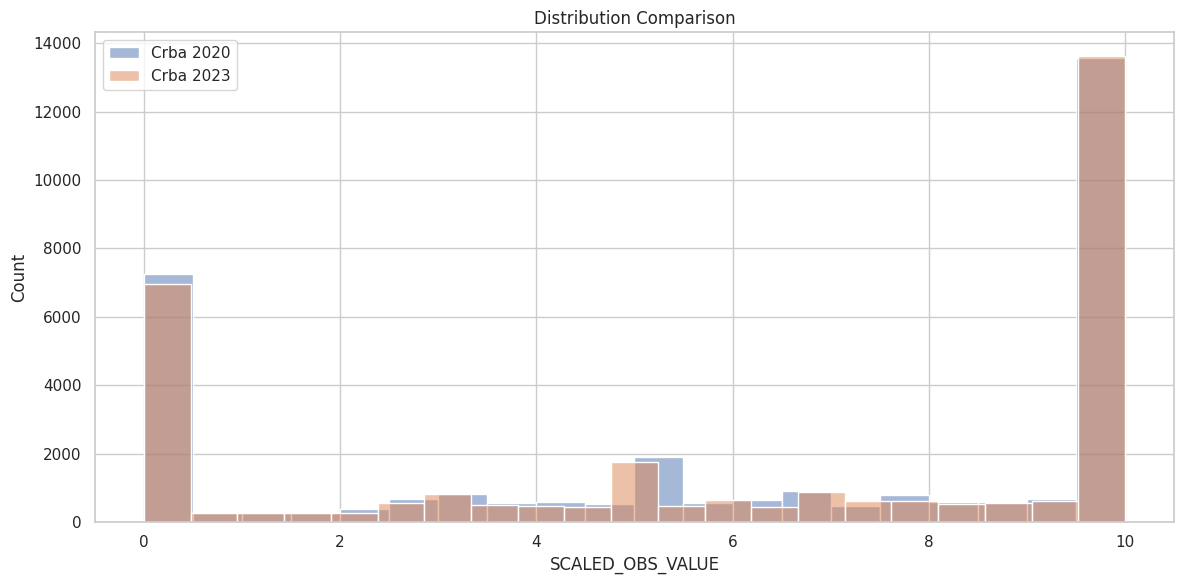

In [11]:
my_comparer.compare_column_distribution("SCALED_OBS_VALUE")

## 3.3.2 Score per Index

['WP', 'Workplace']


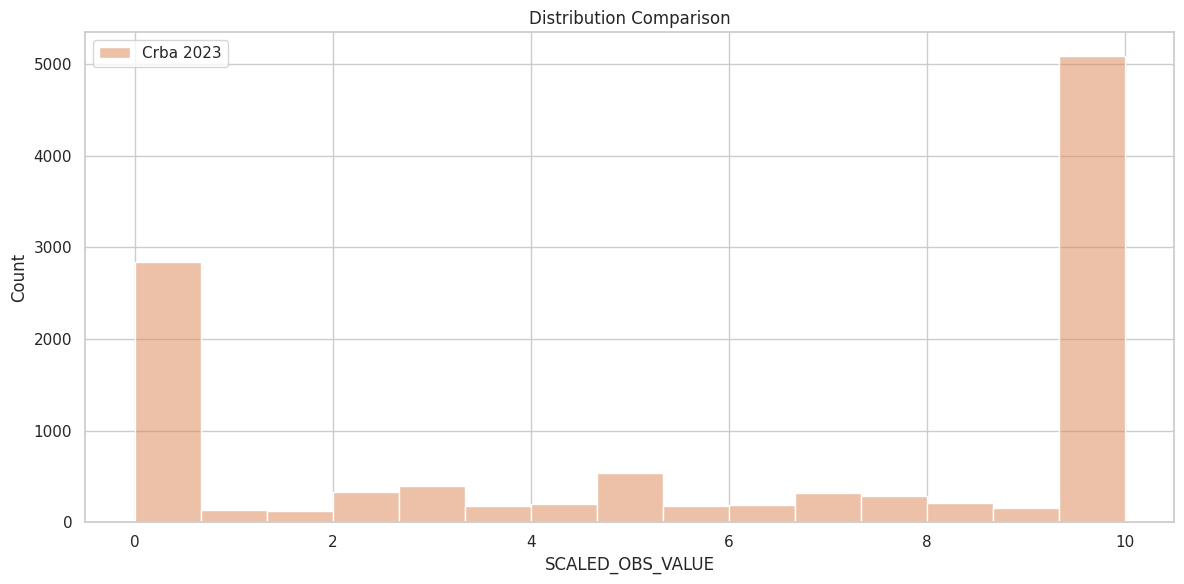

['CE', 'Community and Environment']


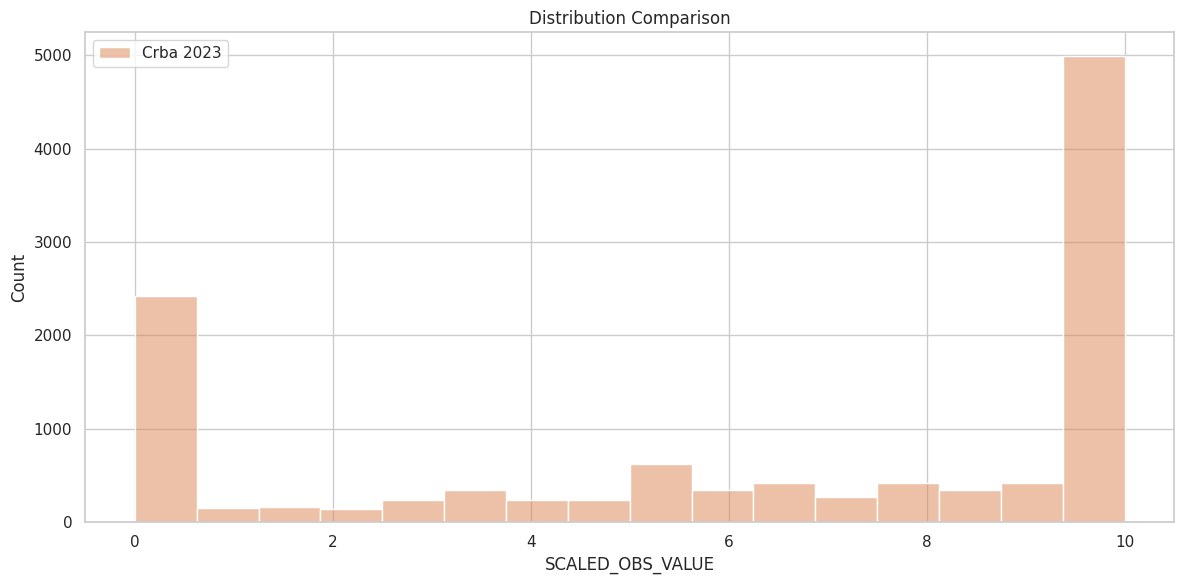

['MP', 'Marketplace']


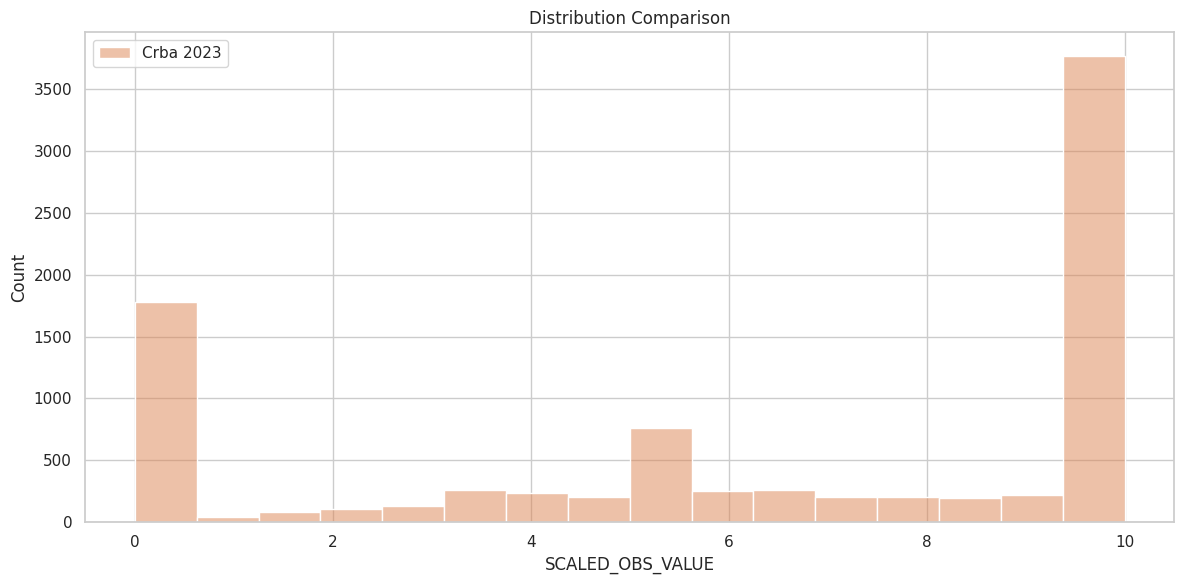

In [12]:
index_list=[
    ["WP", "Workplace"],
    ["CE", "Community and Environment"],
    ["MP", "Marketplace"]
]

for i in index_list:
    print(i)
    my_comparer.compare_column_distribution(
        column_name="SCALED_OBS_VALUE",
        filter_to_subset_df_1=my_comparer.df_1_filtered['INDICATOR_INDEX']==i[0],
        filter_to_subset_df_2=my_comparer.df_2_filtered['INDICATOR_INDEX']==i[1]
    )

### 3.3.3 Per issue

In [13]:
# issue_list=[
#     ["CHLD_LABOUR", "Child labour"],
#     ["ONLINE_ABUSE_EXPL", "Online Abuse and exploitation"],
#     ["MARKETING_ADV", "Marketing and Advertising"],
#     ["RESOURCE_ENV_DAMAGE", "Resource use and damage to the environment"],
#     ["LAND_RIGHTS", "Land rights"],
#     ["SECURITY_ARRANGMENTS", "Security arrangements"],
#     ["NAT_DISASTERS", "Natural disasters"],
#     ["CH_RIGHTS_FULLF", "Fulfillment of children’s rights"],
#     ["DECENT_WORK_COND", "Decent working conditions"],
#     ["MAT_PAT_PROT", "Maternity and paternity protection"],
# ]

# for i in index_list:
#     print(i)
#     my_comparer.compare_column_distribution(
#         column_name="SCALED_OBS_VALUE",
#         filter_to_subset_df_1=my_comparer.df_1_filtered['INDICATOR_ISSUE']==i[0],
#         filter_to_subset_df_2=my_comparer.df_2_filtered['INDICATOR_ISSUE']==i[1]
#     )

## 3.4 Which country has improved/ worsened most?

/home/lasse/Development/crba-allinone/validation/comparison_of_final_files/compare_two_final_csvs.py:145: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df_1 = self.df_1.groupby("COUNTRY_ISO_3", as_index=False).mean()
/home/lasse/Development/crba-allinone/validation/comparison_of_final_files/compare_two_final_csvs.py:146: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df_2 = self.df_2.groupby("COUNTRY_ISO_3", as_index=False).mean()


Top 5 countries which improved most: 
 
     COUNTRY_ISO_3   Unnamed: 0  TIME_PERIOD_2020  RAW_OBS_VALUE_2020  \
159           SSD  6263.591483       2016.938486           60.482494   
157           SOM  1078.743671       2016.503165           89.624640   
45            DJI   243.594340       2016.924528           13.077221   
64            GIN  2907.889717       2017.184799           29.886419   
41            CUB  2042.984586       2017.579961           24.533716   

     CRBA_RELEASE_YEAR_2020  SCALED_OBS_VALUE_2020  CATEGORY_ISSUE_SCORE_2020  \
159                  2020.0               3.212045                   2.939247   
157                  2020.0               3.157852                   3.116227   
45                   2020.0               5.101503                   4.704953   
64                   2020.0               5.426024                   4.220393   
41                   2020.0               6.249020                   5.777768   

     ISSUE_INDEX_SCORE_2020  INDEX_SCOR

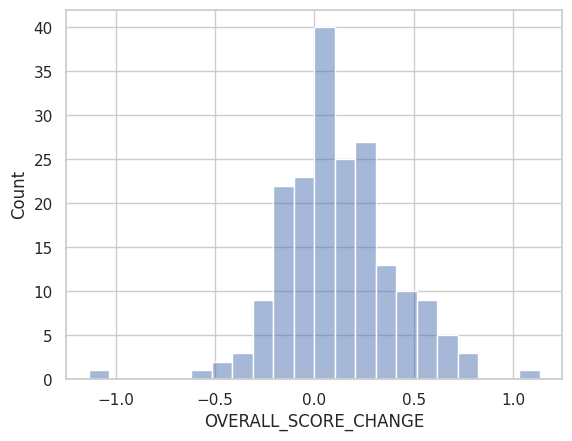

In [14]:
my_comparer.compute_country_score_changes()

## 3.5 For which observations has TIME_PERIOD become older?

In [15]:
my_comparer.calculate_percentage_of_updated_observations()

This is the total number or rows in the merged_df: 29955
This is the number of observations for which 2020 has a newer value than 2023: 45
Number of rows where TIME_PERIOD in df_2 is higher than in df_1: 22410
Percentage of rows where TIME_PERIOD in df_2 is higher than in df_1: 74.81%


## 3.6 Which indicators have been retired/ added between 2020 and 2023? 

In [16]:
my_comparer.find_unique_values("INDICATOR_CODE")

Unique values only in DataFrame  1 ():
{'WP_MP_OC_MACABE', 'WP_CL_LF_CSAELF', 'MP_OL_OC_CHSAEE', 'MP_OL_EN_CSAEGC', 'CE_SA_LF_USCHHP', 'WP_MP_EN_MALECB', 'WP_DW_LF_FREASS', 'WP_CL_OC_PRHAWA', 'WP_MP_OC_COMALE'}

Unique values only in DataFrame 2:
set()


## 3.7 Compairson of length of dataframe

In [17]:
my_comparer.compare_number_of_rows()

The number of rows in df_1 are: 85579
The number of rows in df_2 are: 58615
